# Notebook error analysis 

## Python built-in error types + library customized type of errors


### 1. GitHub - the stack dedup

https://huggingface.co/datasets/bigcode/the-stack-dedup/tree/main/data/jupyter-notebook


In [1]:
# read in all errors from the file
import pandas as pd

df2_err = pd.read_excel('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4.xlsx')
df2_err.head()

,fname,ename,evalue,traceback,lib
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,keyboardinterrupt,NaN,['--------------------------------------------...,"urllib3,selenium"
1,00000-1012-demand-forecasting-data-prep-from-s...,operationalerror,"FATAL: no pg_hba.conf entry for host ""75.166....",['--------------------------------------------...,psycopg2
2,00000-1017-heatmapseq2seq.ipynb,valueerror,"x and y must have same first dimension, but ha...",['--------------------------------------------...,matplotlib
3,00000-1023-crawler-20190515-20190516.ipynb,connectionerror,HTTPSConnectionPool(host='www.backpackers.com....,['--------------------------------------------...,"requests,urllib3"
4,00000-1033-peer-solution-predicting-survival-t...,urlerror,<urlopen error [Errno 11001] getaddrinfo failed>,['--------------------------------------------...,pandas


In [2]:
df2_err.count()

fname        177487
ename        177342
evalue       158653
traceback    177487
lib           62647
dtype: int64

In [3]:
! python --version

Python 3.11.5


In [4]:
import builtins

list_of_exception_names = [
    name for name, value in builtins.__dict__.items() 
    if isinstance(value, type) and issubclass(value, BaseException)
]
unwanted_exps = ["BaseException", "BaseExceptionGroup", "Exception", "ExceptionGroup"]
list_of_exception_names = [ele for ele in list_of_exception_names if ele not in unwanted_exps]
exception_list = [ele.lower() for ele in list_of_exception_names]
len(exception_list)

66

In [5]:
df2_err_builtin_exps = df2_err[df2_err["ename"].isin(exception_list)]
df2_err_other_exps = df2_err[~df2_err["ename"].isin(exception_list)].copy()
print("{0:.2%} errors have {1} different exception names that are the same as Python built-in exceptions".format(len(df2_err_builtin_exps)/len(df2_err),
                                                                                                                len(df2_err_builtin_exps.ename.unique())
))
print("Other {0:.2%} errors ({1} samples) have {2} different exception names".format(len(df2_err_other_exps)/len(df2_err), 
                                                                                  len(df2_err_other_exps),
                                                                                  df2_err_other_exps["ename"].nunique()))


92.79% errors have 55 different exception names that are the same as Python built-in exceptions
Other 7.21% errors (12804 samples) have 1452 different exception names


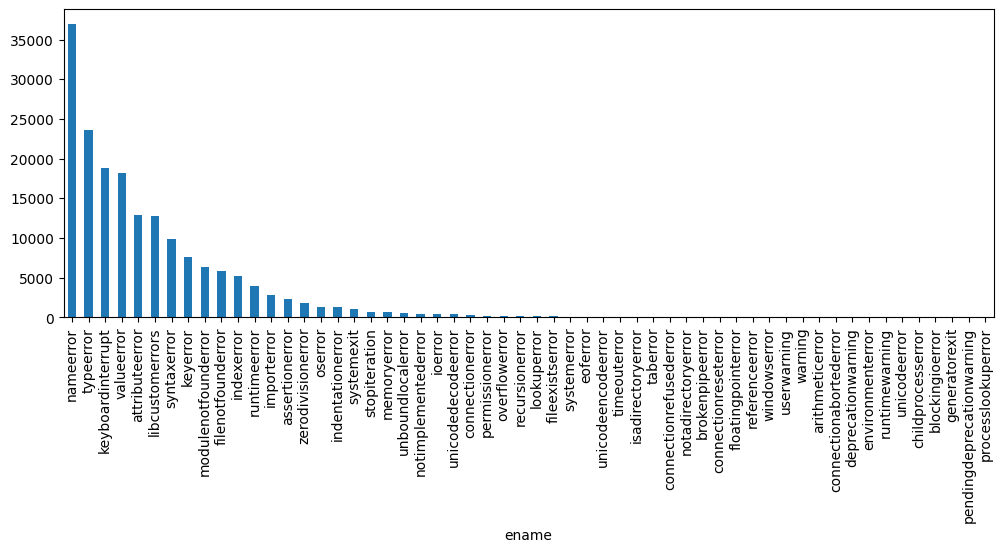

In [6]:
# we adress other exps as library custom exceptions (libcustomerrors)
df2_err.loc[(~df2_err["ename"].isin(exception_list)), "ename"] = "libcustomerrors"
df2_err.to_excel("C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p4_exception_types.xlsx", index=False, engine="xlsxwriter")
df2_err["ename"].groupby([df2_err["ename"]]).count().sort_values(ascending=0).plot(kind="bar", figsize=(12,4))

<Axes: xlabel='ename'>

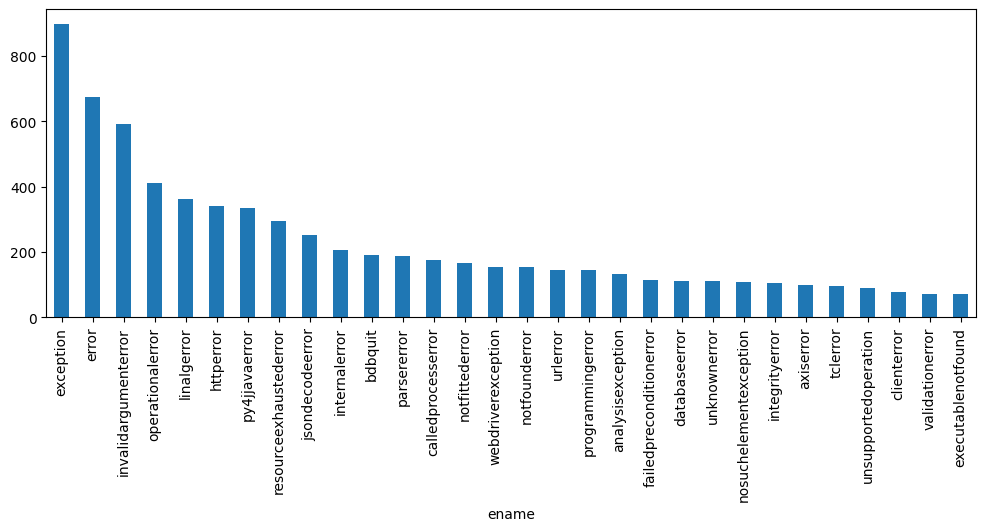

In [7]:
# within the library custom exceptions
df2_err_other_exps["ename"].groupby([df2_err_other_exps["ename"]]).count().sort_values(ascending=0)[:30].plot(kind="bar", figsize=(12,4))

In [32]:
df2_err_other_exps.loc[(df2_err_other_exps["ename"]=="error")&(df2_err_other_exps["lib"].isnull()),"lib"]

26        NaN
184       NaN
720       NaN
819       NaN
820       NaN
         ... 
175231    NaN
175506    NaN
176256    NaN
177238    NaN
177239    NaN
Name: lib, Length: 596, dtype: object

In [36]:
import util

util.print_traceback(df2_err_other_exps.loc[df2_err_other_exps["ename"]=="error","traceback"][720])

---------------------------------------------------------------------------
error                                     Traceback (most recent call last)
<ipython-input-13-d0324d1b3e6c> in <module>()
      6 display_surf = pygame.display.set_mode((400,400))
      7 pygame.display.set_caption('hello world!')
----> 8 img = pygame.image.load('hh.png')
      9 x,y = 10,10
     10 FPS = 60

error: Couldn't open hh.png


### 2. nbs from kaggle


In [1]:
# read in all errors from the file
import pandas as pd

path_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/nberror_k.csv'
df_err = pd.read_csv(path_err, encoding='utf-8')